# K Nearest Neighbour (KNN)

It is classification algorithm in which we find the K-Nearest Neighour which has the highest Similarity with new data point using **Euclidean Distance**.

![Image](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
df = pd.read_csv("./Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


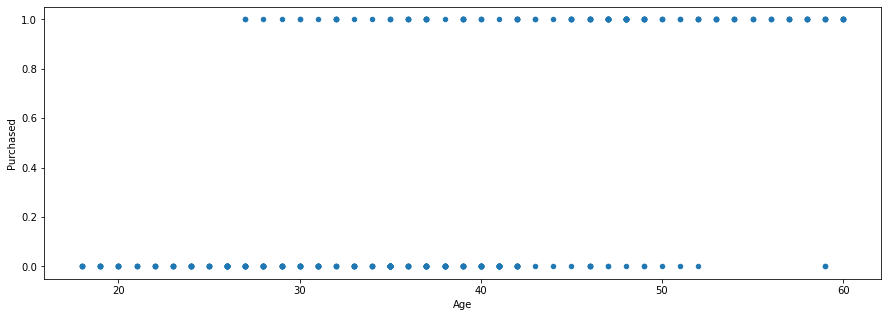

In [3]:
df.plot("Age", "Purchased", kind="scatter", figsize=(15, 5));

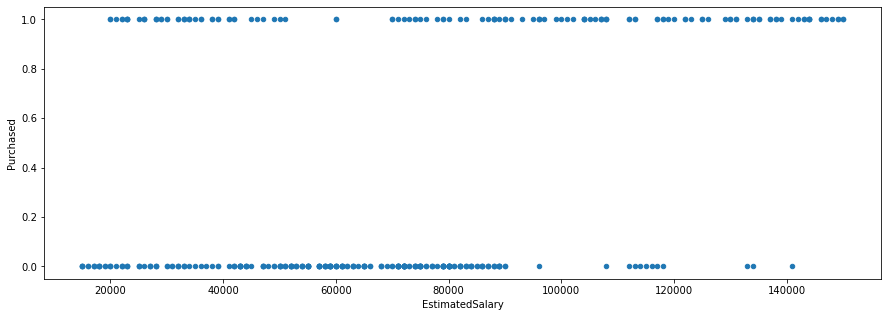

In [4]:
df.plot("EstimatedSalary", "Purchased", kind="scatter", figsize=(15, 5));

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [7]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Split dataset in Train and Test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature Scalling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training KNN Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
classifier.score(X_test_scaled, y_test)

0.93

## Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

y_p = classifier.predict(X_test_scaled)
confusion_matrix(y_test, y_p)

array([[59,  4],
       [ 3, 34]], dtype=int64)

## Predicting new results

In [13]:
def predict(data):
    data = np.array(data).reshape(1, -1)
    data = scaler.transform(data)
    y_p = classifier.predict(data)
    print(y_p)

In [14]:
X_new = [2, 500000]
predict(X_new)

[1]


In [15]:
print(f"Accuracy Score {classifier.score(X_test_scaled, y_test) * 100}%",)

Accuracy Score 93.0%


In [16]:
df_p = pd.DataFrame(y_test, columns=["Actual"])
y_p = classifier.predict(X_test)
df_p["Predicted"] = y_p
df_p

,Actual,Predicted
0,0,1
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
95,0,1
96,1,1
97,0,1
98,1,1
